## Learning a model

at https://dl.dropboxusercontent.com/u/75194/ac297rtut4.ipynb

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper")

In [2]:
def make_plot():
    fig, axes=plt.subplots(figsize=(15,5), nrows=1, ncols=2);
    axes[0].set_ylabel("$p_R$")
    axes[0].set_xlabel("$x$")
    axes[1].set_xlabel("$x$")
    axes[1].set_yticklabels([])
    axes[0].set_ylim([0,1])
    axes[1].set_ylim([0,1])
    plt.tight_layout();
    return axes

If what we are trying to predict is a human process such as an election, where economic and sociological factors are important, we might wish to create a function of various economic and sociological parameters. Such a model has both **correlational**, and a (possibly wrong) causal structure. An example of such a model might be:

*The log of the odds of Romney winning is a linear function of population religiosity, race, poverty, education, and other social and economic indicators. *

The argument here is that, for example, more religious people are more socially conservative and thus more likely to vote republican. Thus there is a **causal story** in our model, which presents as a correlation between religiosity and voting for Romney. This might not be the correct causation, but thats not entirely important for the prediction, as long as the correlation exists. (Maybe its more complex, with more religious people not liking Romney because he is Mormon but voting for him anyways because he presented as anti-immigration)

We would take such a model, data from the census about race, religiousness, and so on, and the polls that pollsters come up with, to make a predictive model for the elections. But remember here too that maximal uncertainty is hardest to deal with here as well: a state thats closet to a 50-50 tossup between Obama and Romney is really hard to predict. Indeed, a lot of the work pollsters and predicters put in is to reduce that uncertainty just enough so that some prediction is possible. 

### A real simple model

To gently step feet in the modelling world, lets see consider very simple model, where the probability of voting for Romney is a function only of how religious the population in a county is. 

Let $x$ be the fraction of religious people in county and $p_R = f(x)$ be the probability of voting for Romney as a function of $x$.

In [3]:
x = np.arange(0,1, 0.01)
size=x.shape[0]

In [4]:
indexes=np.sort(np.random.choice(x.shape[0], size=15, replace=False))

Lets suppose now that the Lord came by and told us that the function and plot below captures $f(x)$ exactly. 

In [5]:
f = sp.stats.norm.cdf(x, loc=0.5, scale=0.3)

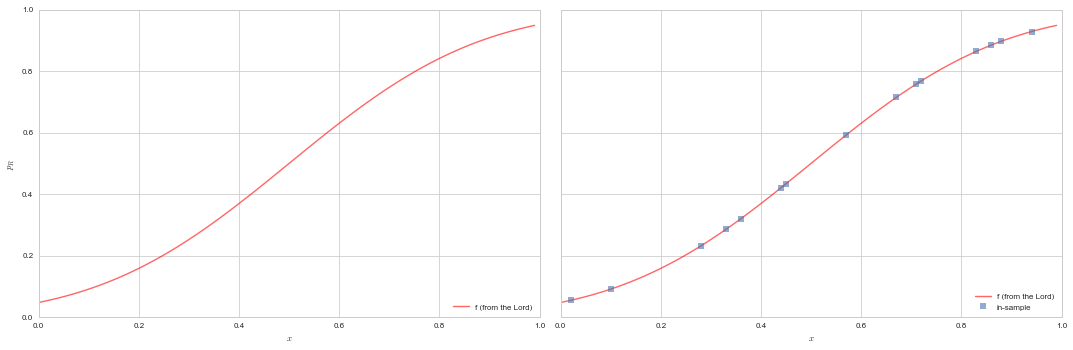

In [6]:
axes=make_plot()
axes[0].plot(x,f, 'r-', alpha=0.6, label="f (from the Lord)");
axes[1].plot(x,f, 'r-', alpha=0.6, label="f (from the Lord)");
axes[1].plot(x[indexes],f[indexes], 's', alpha=0.6, label="in-sample");
axes[0].legend(loc=4);
axes[1].legend(loc=4);

The lightly shaded squares in the right panel plot are a sample of 15 points that we generated from the plot. We'll take these points as the data that was given to us, and then forget the curve that the Lord gave us, like below:

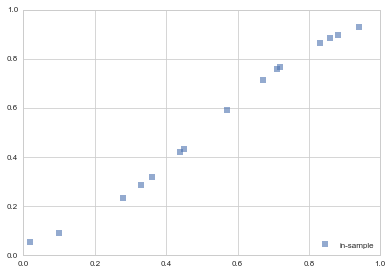

In [7]:
plt.plot(x[indexes],f[indexes], 's', alpha=0.6, label="in-sample");
plt.legend(loc=4);

That is, the Lord also gave us amnesia. Remember that such amnesia is the general case in learning, where we *do not know* the target function, but rather just have some data. Thus what we will be doing is *trying to find functions that might have generated the 15 points of data that we can see* in the hope that one of these functions might approximate $f$ well, and provide us a **predictive model** for future data. This is known as fitting the data.

###Model Selection: the Hypothesis Space

Such a function, one that we use to fit the data, is called a **hypothesis**. We'll use the notation $h$ to denote a hypothesis. Lets consider as hypotheses for the data above, a particular class of functions called polynomials. 

A polynomial is a function that combines multiple powers of x linearly. You've probably seen these in school, when working with quadratic or cubic equations and functions:

\begin{align*}
h(x) &=& 9x - 7 && \,(straight\, line) \\
h(x) &=& 4x^2 + 3x + 2 && \,(quadratic) \\
h(x) &=& 5x^3 - 31x^2 + 3x  && \,(cubic).
\end{align*}

In general, a polynomial can be written thus:

\begin{eqnarray*}
 h(x) &=& a_0 + a_1 x^1 + a_2 x^2 + ... + a_n x^n \\
      &=& \sum_{i=0}^{n} a_i x^i
\end{eqnarray*}

Let us consider as the function we used to fit the data, a hypothesis $h$ that is a straight line. We put the subscript $1$ on the $h$ to indicate that we are fitting the data with a polynomial of order 1, or a straight line. This looks like:

$$ h_1(x) = a_0 + a_1 x $$

We'll call the **best fit** straight line the function $g_1(x)$. What we mean by "best fit" and how we get obtain it, is the key to learning a model, and we'll come to it in a bit. But the idea is this: amongst the set of all lines (i.e., all possible choices of $h_1(x)$), what is the best line $g_1(x)$ that represents the 15 points of data we have?

The best fit $g_1(x)$ is shown in the figure below:

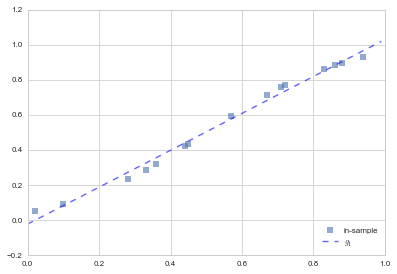

In [8]:
g1 = np.poly1d(np.polyfit(x[indexes],f[indexes],1))
plt.plot(x[indexes],f[indexes], 's', alpha=0.6, label="in-sample");
plt.plot(x,g1(x), 'b--', alpha=0.6, label="$g_1$");
plt.legend(loc=4);

Lets formalize this notion a bit. The set of all functions of a particular kind that we could have used to fit the data is called a **Hypothesis Space**. The words "particular kind" have been deliberately left vague: its our choice as to what we might want to put into a hypothesis space. A hypothesis space is denoted by the notation $\cal{H}$.

Lets consider the hypothesis space of all straight lines $h_1(x)$. We'll denote it as $\cal{H}_1$, with the subscript being used to mark the order of the polynomial. Another such space might be $\cal{H}_2$, the hypothesis space of all quadratic functions. A third such space might combine both of these together.

In this set-up, what we have done in the code and plot above is this: we have made the best fit to the data $g_1$ from the functions in the hypothesis space $\cal{H}_1$. This is not the best fit from all possible functions, but rather, the best fit from the set of all the straight lines. We are using the hypothesis space here as a concept that captures the **complexity** of a model you use to fit data. For example, since quadratics are more complex functions than straight lines, $\cal{H}_2$ is more complex than $\cal{H}_1$. 

In this case, suffering from amnesia about the real model, we decided to use the simplest hypothesis space that gives us some indication of the *trend* of our data: the set of straight lines.

####Deterministic Error or Bias

Notice from the figure above that models in $\cal{H}_1$, i.e., straight lines, and the best-fit straight line $g_1$ in particular, do not do a very good job of capturing the curve of  the data (and thus the underlying function $f$ that we are trying to approximate. Consider the more general case in the figure below, where a curvy $f$ is approximated by a function $g$ which just does not have the wiggling that $f$ has. 

![Bias](https://dl.dropboxusercontent.com/u/75194/images/bias.png)

There is always going to be an error then, in approximating $f$ by $g$. This *approximation error* is shown in the figure by the blue shaded region, and its called **bias**, or **deterministic error**.^[Abu-Mustafa, Learning from Data] The former name comes from the fact that nothing you ever do to a non-wiggly curve will make it wiggle the way $f$ does (nothing will make a straight line curve). The latter name comes from the notion that if you didnt know the target function $f$, which is the case in most learning situations, you would have a hard time distinguishing this error from any other errors such as measurement and stochastic errors.

Going back to our model at hand, it is clear that the space of straight lines $\cal{H}_1$ does not capture the curving in the data. So let us quite arbitraily try the more complex hypothesis space $\cal{H}_{10}$, the set of all 10th order polynomials $h_{10}(x)$:

$$h_{10}(x) = \sum_{i=0}^{10} a_i x^i\,.$$

A 10th order polynomial can give quite different behaviour, as we can see below, by constructing a few 10th order polynomial with random coefficients between -1 and 1:

In [9]:
np.random.rand(11)

array([ 0.79235545,  0.40225773,  0.74699917,  0.26973752,  0.5237167 ,
        0.8442181 ,  0.23864218,  0.26955121,  0.97861303,  0.03682271,
        0.92440645])

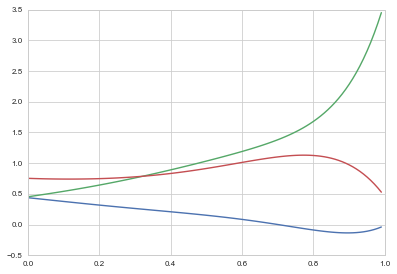

In [10]:
p1=np.poly1d(2*np.random.rand(11)-1)
p2=np.poly1d(2*np.random.rand(11)-1)
p3=np.poly1d(2*np.random.rand(11)-1)
plt.plot(x, p1(x));
plt.plot(x, p2(x));
plt.plot(x, p3(x));

To see how the more complex hypothesis space $\cal{H}_{10}$ does, lets find the best fit 10th order polynomial $g_{10}(x)$.


In [11]:
g10 = np.poly1d(np.polyfit(x[indexes],f[indexes],10))

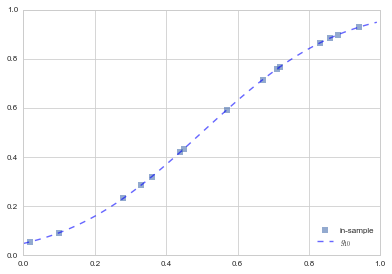

In [12]:
plt.plot(x[indexes],f[indexes], 's', alpha=0.6, label="in-sample");
plt.plot(x,g10(x), 'b--', alpha=0.6, label="$g_{10}$");
plt.legend(loc=4);

Voila! You can see the 10th order polynomial does a much better job of tracking the points, because of the wiggle room it has in making a curve as opposed to a straight line, which well, cant curve. Thus it would seem that $\cal{H}_{10}$ might be a better candidate hypothesis set from which to choose a best fit model. 

We can quantify this by calculating some notion of the bias for both $g_1$ and $g_{10}$. 
To do this we calculate the square of the difference between f and the g's on the entire domain of $x$ between 0 and 1, i.e.:

$$B_1(x) = (g_1(x) - f(x))^2 \,;\,\, B_{10}(x) = (g_1(x) - f(x))^2\,.$$ 

This definition makes sure that we are calculating a positive quantity.

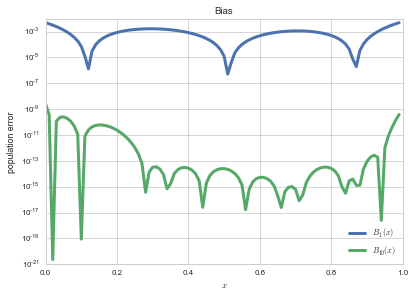

In [13]:
plt.plot(x, (g1(x)-f)**2, lw=3, label="$B_1(x)$")
plt.plot(x, (g10(x)-f)**2, lw=3,label="$B_{10}(x)$");
plt.xlabel("$x$")
plt.ylabel("population error")
plt.yscale("log")
plt.legend(loc=4);
plt.title("Bias");

As you can see the bias or approximation error is much smaller for $g_{10}$.

We have found using the python function `np.polyfit` that $g_{10}$ is the best model in $\cal{H}_{10}$, but how did we arrive at that conclusion? This is the subject of the next section. 

But, is $g_{10}$ the best model for this data from all possible models? Indeed, how do we find the best fit model from the best hypothesis space? This is what **learning** is all about.

###How to learn the best fit model in a hypothesis space

Let's understand in an intuitive sense, what it means for a function to be a good fit to the data. Lets consider, for now, only the hypothesis space $\cal{H}_{1}$, the set of all straight lines. In the figure below, we draw against the data points (in red) one such line $h_1(x)$ (in red).

![Cost](https://dl.dropboxusercontent.com/u/75194/images/linreg.png)

The natural way of thinking about a "best fit" would be to minimize the distance from the line to the points, for some notion of distance. In the diagram we depict one such notion of distance: the vertical distance from the points to the line. These distances are represented as thin black lines.

The next question that then arises is this: how exactly we define the measure of this vertical distance? We cant take the measure of distance to be the y-value of the point minus the y value of the line at the same x, ie $y_i - h_1(x_i)$. Why? If we did this, then we could have points very far from the line, and as long as the total distance above was equal to the total distance below the line, we'd get a net distance of 0 even when the line is very far from the points.

Thus we must use a positive estimate of the distance as our measure. We could take either the absolute value of the distance, $\vert y_i - h_1(x_i) \vert$, or the square of the distance as our measure, $(y_i - h_1(x_i))^2$. Both are reasonable choices, and we shall use the squared distance for now.

We sum this measure up over all our data points, to create whats known as the **cost functional** or **risk functional** of using line $h_1(x)$ to fit our points $y_i \in \cal{D}$ (this notation is to be read as "$y_i$ in $\cal{D}$") :

$$ R_{\cal{D}}(h_i(x)) = \sum_{y_i \in \cal{D}} (y_i - h_1(x_i))^2 .$$

What this formula says is: the cost or risk is just the total squared distance to the line from the observation points. Here we use the word **functional** to denote that, just as in functional programming, the risk is a *function of the function* $h_1(x)$. 

We also make explicit the data set $\cal{D}$, because the value of the risk depends upon the points at which we made our observation. If we had made these observations $y_i$ at a different set of $x_i$, the value of the risk would be somewhat different. The hope in learning is that the risk will not be too different, as we shall see in the next section

Now, given these observations, and the hypothesis space $\cal{H}_1$, we minimize the risk over all possible functions in the hypothesis space to find the **best fit** function $g_1(x)$:

$$ g_1(x) = \arg\min_{h_1(x) \in \cal{H}} R_{\cal{D}}(h_1(x)).$$

Here the notation 

$"\arg\min_{x} F(x)"$ 

means: give me the argument of the functional $x$ at which $F(x)$ is minmized. So, for us: give me the function $g_1(x) = h_1$ at which the risk $R_{\cal{D}}(h_1)$ is minimized; i.e. the minimization is over *functions* $h_1$.

(We'll worry about how to actually do this minimization later, currently we are just interested in the conceptual notions).

And this is exactly what the python function `np.polyfit(x,h,n)` does for us, and is what we used to fit the straight line $g_1$ to the data, where we minimized over the hypothesis space $\cal{H}_1$. An identical procedure was followed to fit polynomial of order 10, where we then minimized over the hypothesis space $\cal{H}_{10}$.

Thus we can in general write:

$$ g(x) = \arg\min_{h(x) \in \cal{H}} R_{\cal{D}}(h(x)),$$

where $\cal{H}$ is a general hypothesis space of functions.

###The structure of learning

Let's illustrate this structure with a diagram, in a bit more depth, so that we can get to the core of the learning problem. We shall use the figure below, which I adopted from Yasser Abu-Mustafa's excellent book on machine learning.

![Basic Learning](https://dl.dropboxusercontent.com/u/75194/images/BasicModel.png)

We have a target function $f(x)$ that we do not know. But we do have a sample of data points from it, $(x_1,y_1), (x_2,y_2), ..., (x_n,y_n)$. We call this the **sample** or **training examples** $\cal{D}$. We are interested in using this sample to estimate a function $g$ to approximate the function $f$, and which can be used for prediction at new data points, also called **out-of-sample prediction**. 

To do this, we use an algorithm, called the **learner**, which chooses functions from a hypothesis set $\cal{H}$ and computes a cost measure or risk functional (like the sum of the squared distance over all points in the data set) for each of these functions. It then chooses the function $g$ which **minimizes** this cost measure, and gives us a final hypothesis $g$ which we then use to approximate or estimate f **everywhere**, not just at the points in our data set. 

We write $g \approx f$, or $g$ is the **estimand** of $f$. This process is called **Empirical Risk Minimization** (ERM) as we minimize the cost measure over the empirically observed points.

Why do we think that this might be a good idea? What are we really after?

What we'd like to do is **make good predictions**. In the language of cost, what we are really after is to minimize the cost **out-of-sample**, on the population at large, or on any **test set** of new points. But this presents us with a conundrum: how can we minimize the risk on points we havent yet seen?

This is why we (a) minimize the risk on the set of points that we have, or do ERM to find $g$ and then (b) hope that once we have found our best model $g$, our risk does not particularly change when using a different set of points, or test sample with this $g$. 

In a sense, this is our old issue: how can we draw conclusions about the population from a sample. The only difference here is that we have both **data covariates** $x_i$ as well as **data points** $y_i$.

#### The role of sampling

Intuitively, to do this, we need to ask ourselves, how representative is our sample? Or more precisely, how representative is our sample of our training points of the population or test points that we want to predict for? 

In our example, if we only want to use $g$, our estimand of $f$ to predict for large $x$, or more religious counties, we would need a good sampling of points $x$ closer to 1. And, similarly, our test points or population would also need to be representative of those counties. We wont do well if we try and predict low-religiousness counties from a sample of high-religiousness ones. Or, if we do want to predict over the entire range of religiousness, our training sample better cover all $x$ well.

This is why, in the diagram above, we introduce the "input" probability distribution $P(x)$, and draw lines from it to both our sample set and our final hypothesis. We thus indicate that both the training set that we use to estimate $g$ from, and the test set or population that we want to predict on must be drawn from the same distribution. 

Once we have done that, we can then intuitively say that, if we find a hypothesis $g$ that minimizes the cost or risk over the training set; this hypothesis *might* do a good job over any test set drawn from the population that the training set was representative of, since the risk on the test set ought to be similar to that on the training set, and thus small.

Mathematically, we are saying that:

\begin{eqnarray*}
A &:& R_{\cal{D}}(g) \,\,smallest\,on\,\cal{H}\\
B &:& R_{out \,of \,sample} (g) \approx R_{\cal{D}}(g)
\end{eqnarray*}


In other words, because of the similarity of the training and test sets, we hope the **empirical risk estimates the out of sample risk well, and thus the out of sample risk is also small**.


#### But this is not enough

You probably noticed that I used weasel words like "might" and "hope" in the last section when saying that representative sampling in both training and test sets combined with ERM is what we need to learn a model. Let me give you a very simple counterexample: a prefect memorizer.

Suppose I construct a model which memorizes all the data points in the training set. Then its emprical risk is zero by definition, but it has no way of predicting anything on a test set. Thus it might as well choose the value at a new point randomly, and will perform very poorly.

Ok, you might say, we have constructed a pathological example, which has none of the constraints and regularity of hypothesis spaces like $\cal{H}_1$ and $\cal{H}_{10}$. You have a point.

Indeed, as we can see below, $g_{10}$ does an excellent job on the population (here we plot both our sample and the other 85 points which the Lord hid from us against $g_{10}$) and not just on the sample.

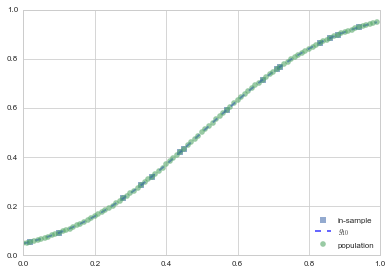

In [14]:
plt.plot(x[indexes],f[indexes], 's', alpha=0.6, label="in-sample");
plt.plot(x,g10(x), 'b--', alpha=0.6, lw=2, label="$g_{10}$");
plt.plot(x,f, 'o', alpha=0.6, label="population");
plt.legend(loc=4);

However, note that the data obtained from $f$, our target, was still quite smooth. Most real-world data sets are not smooth at all, because of various effects such as measurement errors, other co-variates, and so on. Such **stochastic noise** plays havoc with our fits, as we shall see soon.

###Stochastic Noise

Stochastic noise bedevils almost every data set known to humans, and happens for many different reasons. 

Consider for example two customers of a bank with identical credit histories and salaries. One defaults on their mortgage, and the other does not. In this case we have identical $x$ for these two customers, but different $y$. The true $y$ here might be a function of other co-variates, such as marital strife, sickness of parents, etc. But, as the bank, we might not have this information. So we get different $y$ for different customers at the information $x$ that we possess.

A similar thng might be happen in the election example, where we have modelled the probability of voting for romney as a function of religiousness. There are many other variables we might not have measured. A religious black person might not be inclined to vote for Romney the way an religious white person might.  But, we dont know this information. Thus, in certain parts of our sample space of religiousness we might have more noise than in others. Consider for example two counties, one with $x=0.8$ fraction of self-identified religious people in the county, and another with $x=0.82$. Say both counties are in the south. If the first county was white-dominated, the fraction of those claiming they would vote for Romney might be large, whereas if the second was black dominated, the reverse might occur, and you might get two $y$'s of very different value next to each other on our graphs.

It gets worse. All such polling done in counties or states uses finite samples. So there is a 4-6\% polling error in any of these estimates. This "sampling noise" adds to the noisiness of the $y$'s, especially if there are very few polls in that county which we aggregate.

Such errors typically come in both positive and negative around an average value of 0, and can be dealt with statistically. The usual way to do this is to imagine that the errors follow a bell curve or normal distribution with mean at 0. The reason this is a good assumption is a theorem called the Central Limit Theorem, which we shall talk about later in the book. Lets simulate these errors to see how they affect the process of learning.

In [15]:
sigma=0.06
y = f + sp.stats.norm.rvs(scale=sigma, size=size)
#the next three lines just ensure that y remains a probability
yadd = (y < 0.0) *(0.01-y)
ysub = (y > 1.0)*(y - 1.0)
y = y + yadd -ysub

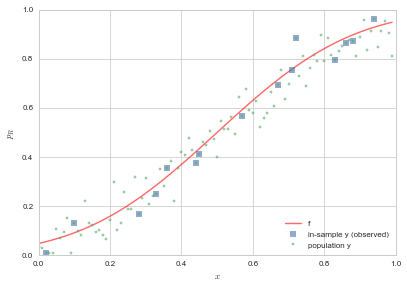

In [16]:
plt.plot(x,f, 'r-', alpha=0.6, label="f");
plt.plot(x[indexes], y[indexes], 's', alpha=0.6, label="in-sample y (observed)");
plt.plot(x, y, '.', alpha=0.6, label="population y");
plt.xlabel('$x$');
plt.ylabel('$p_R$')
plt.legend(loc=4);

In the figure above, one can see the scatter of the $y$ population about the curve of $f$. The errors of the 15 observation points ("in-sample") are shown as squares. One can see that observations next to each other can now be fairly different, as we descibed above.

#### Systematic error

There is yet another class of errors called **systematic errors**. For example, sampling of respondents for an election might be done poorly. For example, if you were to only call people with land-lines to ask such questions, your respondents would likely skew older. And you would have a sampling bias in your polls. In the 2012 poll cycle, Rasmunnsen had a systematic bias in favor of republicans which had to be corrected for by various forecasters.^[REF].

Similarly, in observing or experimenting with physical phenomenon, the measuring instruments might have a systematic error. For example, an altimeter needs to be callibrated to an altitude correcly. If you do this wrong, you will have wrong altitudes (by the same amount) everywhere. Also, if the weather changes while you are at that original altitude, you might lose that original callibration (since altimeters rely on air pressure, the altimeter will think you've moved to a different altitude). As another example, if a measuting rope has stretched out, your yardage  measurements on a football field might be different.

These sorts of errors cannot be modelled statistically and need to be dealt with on a case by case basis. As a modeler, you must be alert to their possibility or prescence.

###Fitting a noisy model: the complexity of your hypothesis

Let us now try and fit the noisy data we simulated above, both using straight lines ($\cal{H}_1$), and 10th order polynomials($\cal{H}_{10}$). We update out learning diagram with just one change below: 
![Noisy Learning](https://dl.dropboxusercontent.com/u/75194/images/NoisyModel.png)

The change is the introduction of a noisy target $y$, so that

$$y = f(x) + \epsilon\,,$$

where $\epsilon$ is a noise term that represents the stochastic noise. In the simulation of errors above we assumed that $\epsilon$ came from a bell curve. We now fit in both $\cal{H}_1$ and $\cal{H}_{10}$ to find the best fit straight line and best fit 10th order polynomial respectively.

In [17]:
g1noisy = np.poly1d(np.polyfit(x[indexes],y[indexes],1))
g10noisy = np.poly1d(np.polyfit(x[indexes],y[indexes],10))

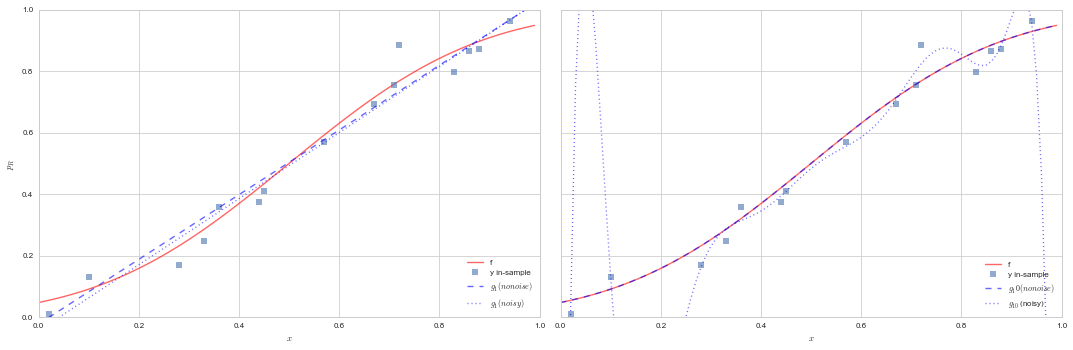

In [18]:
axes=make_plot()
axes[0].plot(x,f, 'r-', alpha=0.6, label="f");
axes[1].plot(x,f, 'r-', alpha=0.6, label="f");
axes[0].plot(x[indexes],y[indexes], 's', alpha=0.6, label="y in-sample");
axes[1].plot(x[indexes],y[indexes], 's', alpha=0.6, label="y in-sample");
axes[0].plot(x,g1(x),  'b--', alpha=0.6, label="$g_1 (no noise)$");
axes[0].plot(x,g1noisy(x), 'b:', alpha=0.6, label="$g_1 (noisy)$");
axes[1].plot(x,g10(x),  'b--', alpha=0.6, label="$g_10 (no noise)$");
axes[1].plot(x,g10noisy(x), 'b:', alpha=0.6, label="$g_{10}$ (noisy)");
axes[0].legend(loc=4);
axes[1].legend(loc=4);

The results are (to put it mildly) very interesting. 

Lets look at the figure on the left first. The noise changes the best fit line by a little but not by much. The best fit line still does a very poor job of capturing the variation in the data.

The best fit 10th order polynomial, in the presence of noise, is very interesting. It tries to follow all the curves of the observations..in other words, it tries to fit the noise. This is a disaster, as you can see if you plot the population points on the plot as well:

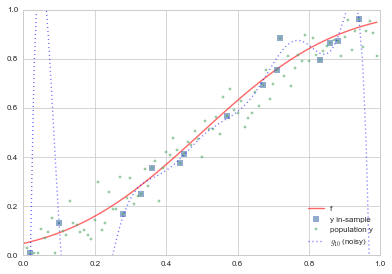

In [19]:
plt.plot(x,f, 'r-', alpha=0.6, label="f");
plt.plot(x[indexes],y[indexes], 's', alpha=0.6, label="y in-sample");
plt.plot(x,y,  '.', alpha=0.6, label="population y");
plt.plot(x,g10noisy(x), 'b:', alpha=0.6, label="$g_{10}$ (noisy)");
plt.ylim([0,1])
plt.legend(loc=4);

Whoa. This fitting to the noise is a phenomenon you will see again and again in learning. Its called **overfitting**. So, $\cal{H}_{10}$ which seemed to be such a good candidate hypothesis space in the absence of noise, ceases to be one. And this is why we were waffling earlier when we talked about the input probability distribution and sampling: it is **not enough** for the sampling to be representative in both the trainig data set and the test set or population; we must further ensure that our **model does not fit the noise**.

Indeed, by making a plot similar to the one we made for the bias earlier, we can compare the error in the new $g_1$ and $g_{10}$ fits on the noisy data.

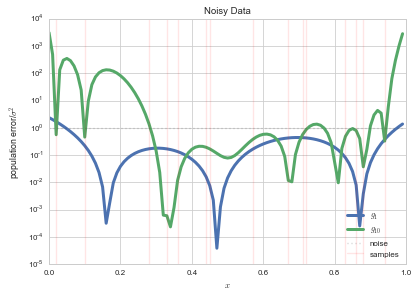

In [20]:
plt.plot(x, ((g1noisy(x)-f)**2)/(sigma**2), lw=3, label="$g_1$")
plt.plot(x, ((g10noisy(x)-f)**2)/(sigma**2), lw=3,label="$g_{10}$");
plt.plot(x, [1]*x.shape[0], "k:", label="noise", alpha=0.2);
for i in indexes[:-1]:
    plt.axvline(x[i], 0, 1, color='r', alpha=0.1)
plt.axvline(x[indexes[-1]], 0, 1, color='r', alpha=0.1, label="samples")
plt.xlabel("$x$")
plt.ylabel("population error/$\sigma^2$")
plt.yscale("log")
plt.legend(loc=4);
plt.title("Noisy Data");

$g_1$ now, for the most part, has a lower error! So you'd be better off by having chosen a set of models with bias or deterministic noise (the straight lines, $\cal{H}_1$) than a more complex model set ($\cal{H}_{10}$) in the case of noisy data. 

###The Variance of your model

This tendency of a more complex model to overfit, by having enough freedom to fit the noise, is described by something called high **variance**. What is variance?

Variance, simply put, is the "error-bar" or spread in models that would be learnt by training on different data sets $\cal{D}_1, \cal{D}_2,...$ drawn from the population. Now, this seems like a circular concept, as in real-life, you do not have access to the population. But since we simulated our data here anyways, we do, and so let us see what happens if we choose 15 points randomly from our population, and fit models in both $\cal{H}_1$ and $\cal{H}_{10}$ to them. We do this on 200 sets of randomly chosen (from the population) data sets of 15 points and plot the best fit models in noth hypothesis spaces for all 200 sets.

In [21]:
def gen(degree, nsims, size, x, out):
    outpoly=[]
    for i in range(nsims):
        indexes=np.sort(np.random.choice(x.shape[0], size=size, replace=False))
        pc=np.polyfit(x[indexes], out[indexes], degree)
        p=np.poly1d(pc)
        outpoly.append(p)
    return outpoly

In [22]:
polys1 = gen(1, 200, 15,x, y)
polys10 = gen(10, 200, 15,x, y)

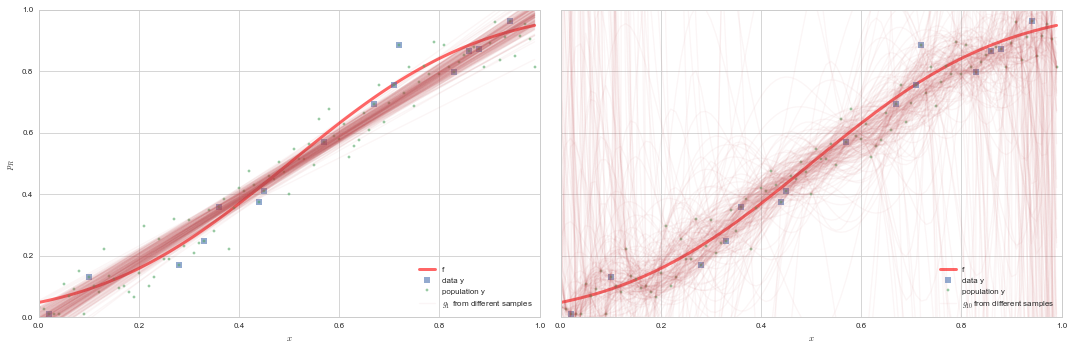

In [23]:
axes=make_plot()
axes[0].plot(x,f, 'r-', lw=3, alpha=0.6, label="f");
axes[1].plot(x,f, 'r-', lw=3, alpha=0.6, label="f");
axes[0].plot(x[indexes], y[indexes], 's', alpha=0.6, label="data y");
axes[1].plot(x[indexes], y[indexes], 's', alpha=0.6, label="data y");
axes[0].plot(x, y, '.', alpha=0.6, label="population y");
axes[1].plot(x, y, '.', alpha=0.6, label="population y");
c=sns.color_palette()[2]
for i,p in enumerate(polys1[:-1]):
    axes[0].plot(x,p(x), alpha=0.05, c=c)
axes[0].plot(x,polys1[-1](x), alpha=0.05, c=c,label="$g_1$ from different samples")
for i,p in enumerate(polys10[:-1]):
    axes[1].plot(x,p(x), alpha=0.05, c=c)
axes[1].plot(x,polys10[-1](x), alpha=0.05, c=c, label="$g_{10}$ from different samples")
axes[0].legend(loc=4);
axes[1].legend(loc=4);

On the left panel, you see the best fit straight lines for 200 different choices of 15 point training sets from the 100 point population. The best-fit lines bunch together, even if they dont quite capture $f$ (the thick red line) or the data (squares) terribly well.

On the right panel, we see the same with best-fit models chosen from $\cal{H}_{10}$. It is a diaster. While most of the models still band around the central trend of the real curve $f$ and data $y$, a substantial amount of models veer off in all kinds of noisy hair all over the plot. This is **variance**: the error bars in the predictions at any given point are very high.

The variance can be seen in a different way by plotting the coefficients of the polynomial fit. Below we plot the coefficients of the fit in $\cal{H}_1$. The variance is barely 0.2 about the mean for both co-efficients.

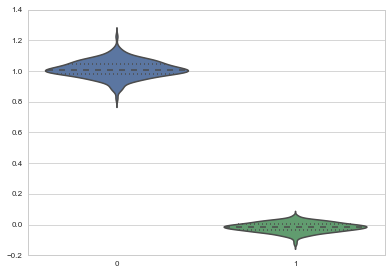

In [24]:
pdict={}
for i in reversed(range(2)):
    pdict[i]=[]
    for j, p in enumerate(polys1):
        pdict[i].append(p.c[i])
df=pd.DataFrame(pdict)
sns.violinplot(df);
    

Then we plot the coefficients of the fit in $\cal{H}_{10}$. The variance of the middle coefficients is of the order $10^8$ (the vertical height of the bulges), with huge outliers!! The 10th order polynomial fits are a disaster!

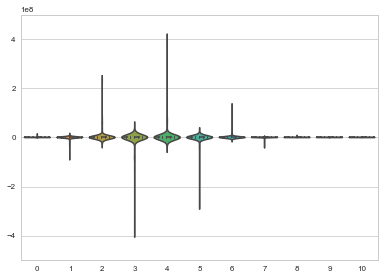

In [25]:
pdict={}
for i in reversed(range(11)):
    pdict[i]=[]
    for j, p in enumerate(polys10):
        pdict[i].append(p.c[i])
df=pd.DataFrame(pdict)
sns.violinplot(df);

### Considerations in learning a model

At this point, something may have been causing you a certain amount of heartburn. We've had a data set with only 15 points. And yet, we tried to fit a 10th order polynomial to it?

#### The size of the data sample

Why should this be cause for heartburn? Intuitively we know that this is too little data to try and constrain such a complex model well. There is just too little power in the data to be able to fit 10-coefficients tightly. Thus our fits in $\cal{H}_{10}$ are going to be bad. The coefficients will not be well constrained, as we saw above. Indeed, consider the edge case of fitting a 15th order polynomial. We'd then get a polynomial that would interpolate all 15 points. But it would wiggle so much that it would be a disaster on any new points. And that is ultimately what we want: the ability to predict the function at new points, or out-of-sample, well.

The fit in $\cal{H}_{1}$ did better as we were much more conservative about the complexity of the polynomial we tried to fit, having only 15 points of data. The critical thing here is, the complexity of the models we choose must be conservative enough for the amount of data we have been given. The **model complexity must match the amount of data, rather than the complexity of $f$, also known as the target complexity**. This is an important and often forgotten point.

#### Noise makes small samples bad for learning

At this point you might object, saying that when the data had no stochastic noise, $\cal{H}_{10}$ was a fine hypothesis space, even with just 15 data points. Indeed, you are right. If you do a similar variance plot for the noiseless model, 10th order polynomial coefficients will show very little variance. This is as any 15 points we may choose are pretty near to the 10th order best fit polynomial, anywhere on the domain of $x$. But, real life problems like predicting Romney's chances always have noise. And in the presence of noise, choosing too high a complexity for the estimand $g$ has bad consequences. 

The point here is, you dont know that you dont have noise. It could be just by chance that those 15 points of data you were given happened to be aligned so that you are on a smooth 10d polynomial. When new data comes in you could be in trouble. So, why not be conservative and choose a simpler model?

Indeed,  we have seen that the simpler model (straight lines) do not capture the curve of the data well, but the smaller variance in that fit means we'd atleast be in the ballpark of the right value of the chances of Romney winning on a new data point. In other words, we've accepted some **bias** in the shape of the prediction for reducing the **variance** of the prediction; for a very variant prediction is no prediction at all.

Remember: if you have a more complex model, and less data to fit; for a hypothesis space whose hypotheses have lots of room to curve and wiggle, the odds that a randomly chosen model in the hypothesis space will fit the data increases. And because it fit the data randomly, we cant expect it to have any predictive power. If you increase the amount of data (more constraining), or decrease the complexity(less wiggle), the odds that a random model will fit are less. Or to put it another way, in that situation, if you find a good fit, the odds that it happened randomly are much smaller.

#### The role of the complexity of the target

Cleearly, the **target complexity** matters as well. If the target $f$ itself is more complex, but we dont know it, and we have little data to go on, the best we can do is to use a simpler hypothesis space to protect against overfitting and high variance, as we have seen. And if we have enough data from a complex $f$ to work with, so that we can use more complex hypothesis spaces, we run the risk of overfitting anyways. 


In [26]:
df=pd.DataFrame({'x':x, 'f': f, 'y':y})
df.head()

,f,x,y
0,0.047790,0.00,0.032951
1,0.051199,0.01,0.027487
2,0.054799,0.02,0.010000
3,0.058596,0.03,0.010000
4,0.062597,0.04,0.010000


In [27]:
df['traini'] = [True if i in indexes else False for i in df.index]

In [28]:
df.head()

,f,x,y,traini
0,0.047790,0.00,0.032951,False
1,0.051199,0.01,0.027487,False
2,0.054799,0.02,0.010000,True
3,0.058596,0.03,0.010000,False
4,0.062597,0.04,0.010000,False


In [29]:
df.to_csv("romneysamples.csv", index=False)

###The structure of scikit-learn

First, a bit about the structure of scikit-learn:

Some of the following text is taken from the scikit-learn API paper: http://arxiv.org/pdf/1309.0238v1.pdf

>All objects within scikit-learn share a uniform common basic API consisting of three complementary interfaces: an estimator interface for building and ﬁtting models, a predictor interface for making predictions and a transformer interface for converting data.
The estimator interface is at the core of the library. It deﬁnes instantiation mechanisms of objects and exposes a fit method for learning a model from training data. All supervised and unsupervised learning algorithms (e.g., for classiﬁcation, regression or clustering) are oﬀered as objects implementing this interface. Machine learning tasks like feature extraction, feature selection or dimensionality reduction are also provided as estimators.

An example along these lines:

```python
clf = LogisticRegression()
clf.fit(X_train, y_train)
```

If one changes classifiers, say, to a Random Forest classifier, one would simply replace LogisticRegression() in the snippet above by RandomForestClassifier().

>The predictor interface extends the notion of an estimator by adding a predict method that takes an array X_test and produces predictions for X_test, based on the learned parameters of the estimator. In the case of supervised learning estimators, this method typically returns the predicted labels or values computed by the model. Some unsupervised learning estimators may also implement the predict interface, such as k-means, where the predicted values are the cluster labels.

```python
clf.predict(X_test)
```

>Since it is common to modify or ﬁlter data before feeding it to a learning algorithm, some estimators in the library implement a transformer interface which deﬁnes a transform method. It takes as input some new data X_test and yields as output a transformed version of X_test. Preprocessing, feature selection, feature extraction and dimensionality reduction algorithms are all provided as transformers within the library.

This is usually done via the fit_transform method. For example, to do a PCA:

```python
pca = RandomizedPCA(n_components=2)
train_x = pca.fit_transform(train_x)
test_x = pca.transform(test_x)
```

The training set here is "fit" to find the PC components, and then then transformed. Since pca.fit() by itself changes the pca object, if we want to transform other data using the same transformation we simply call transform subsequently.


From: http://nbviewer.ipython.org/urls/raw.github.com/jakevdp/sklearn_scipy2013/master/rendered_notebooks/02.1_representation_of_data.ipynb

>Most machine learning algorithms implemented in scikit-learn expect data to be stored in a two-dimensional array or matrix. The arrays can be either numpy arrays, or in some cases scipy.sparse matrices. The size of the array is expected to be [n_samples, n_features]

###Test and Train Error

In [30]:
df=pd.read_csv("romneysamples.csv")
df.head()

,f,x,y,traini
0,0.047790,0.00,0.032951,False
1,0.051199,0.01,0.027487,False
2,0.054799,0.02,0.010000,True
3,0.058596,0.03,0.010000,False
4,0.062597,0.04,0.010000,False


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

xntrain= df.x[df.traini].values
fntrain = df.f[df.traini].values
yntrain = df.y[df.traini].values
xntest= df.x[df.traini==False].values
fntest = df.f[df.traini==False].values
yntest = df.y[df.traini==False].values

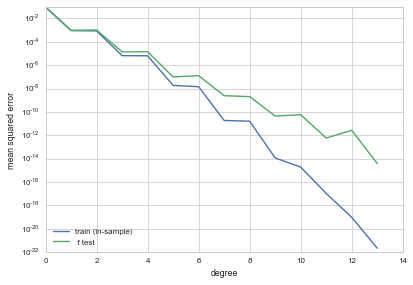

In [50]:
from sklearn.metrics import mean_squared_error
degrees=range(14)
error_train=np.empty(len(degrees))
error_test=np.empty(len(degrees))
for d in degrees:
    Xtrain = PolynomialFeatures(d).fit_transform(xntrain.reshape(-1,1))
    Xtest = PolynomialFeatures(d).fit_transform(xntest.reshape(-1,1))
    est = LinearRegression()
    est.fit(Xtrain, fntrain)
    error_train[d] = mean_squared_error(fntrain, est.predict(Xtrain))
    error_test[d] = mean_squared_error(fntest, est.predict(Xtest))

plt.plot(degrees, error_train,label='train (in-sample)')
plt.plot(degrees, error_test, label=' f test')
#plt.ylim((0.0, 1e0))
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='lower left');
plt.yscale("log")

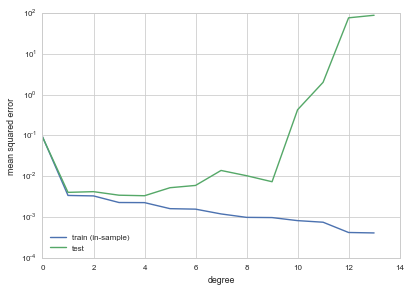

In [49]:
degrees=range(14)
error_train=np.empty(len(degrees))
error_test=np.empty(len(degrees))
for d in degrees:
    Xtrain = PolynomialFeatures(d).fit_transform(xntrain.reshape(-1,1))
    Xtest = PolynomialFeatures(d).fit_transform(xntest.reshape(-1,1))
    est = LinearRegression()
    est.fit(Xtrain, yntrain)
    error_train[d] = mean_squared_error(yntrain, est.predict(Xtrain))
    error_test[d] = mean_squared_error(yntest, est.predict(Xtest))

plt.plot(degrees, error_train,label='train (in-sample)')
plt.plot(degrees, error_test, label='test')
#plt.ylim((0.0, 1e0))
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='lower left')
plt.yscale("log")

In [48]:
error_test

array([  9.18195801e-02,   4.06393376e-03,   4.22930248e-03,
         3.46413467e-03,   3.36171772e-03,   5.27960984e-03,
         6.00089491e-03,   1.39394339e-02,   1.03770143e-02,
         7.38889376e-03,   4.24072651e-01,   1.98699719e+00,
         7.48754237e+01,   8.64635307e+01])

In [41]:
def plot_functions(est, ax, alpha, Xtest):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(df.x, df.f, color='red', label='f')
    ax.plot(xntrain, yntrain, 's', label="training")
    ax.plot(xntest, yntest, '.', alpha=0.4, label="training")
    ax.plot(xntest, est.predict(Xtest),  label="alpha = %s" % str(alpha))
    ax.set_ylim((0, 1))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right')
    
def plot_coefficients(est, ax):
    coef = est.coef_.ravel()
    ax.semilogy(np.abs(coef), marker='o')
    ax.set_ylim((1e-1, 1e8))
    ax.set_ylabel('abs(coefficient)')
    ax.set_xlabel('coefficients')

###Regularization

The idea here is to **regularize** or smooth or restrict the choices of the kinds of functions that we allow in our fits. In other words, we are trying to bring down the complexity of the hypothesis space.

Thus, if we want to fit with a 13th order polynomial, ok, lets fit with it, but lets reduce the size of $\cal{H}_{13}$ that we allow.

In a sense we have already done this, havent we? When we chose $\cal{H}_2$ over $\cal{H}_{10} previously, we imposed a **hard constraint** by setting all other polynomial co-efficients to 0. Instead we might want to set a **soft constraint** by setting:

$$\sum_{i=0}^j a_i^2 < C$$

We do this by adding a term to the empirical risk that we minimize on the training data for $\cal{H}_j$:

$$ \sum_{y_i \in \cal{D}} (y_i - h_j(x_i))^2 +\alpha \sum_{i=0}^j a_i^2.$$

Note that this sum takes the empirical risk and adds a term to it to minimize overfitting. So we are trying to estimate the **test** error by adding a term to the **training error**, and them minimizing the whole thing. But it is critical to remember that this minimization is being done over the training data, once the regularization parameter is fixed.

This technique is called regularization or shrinkage and takes the coefficients $a_i$ towards smaller sizes. For polynomials this corresponds to choosing smooth functions over wiggly functions. When $\alpha=0$ we have the regular regression problem. The problem with a non-zero $\alpha$ is called **ridge regression**


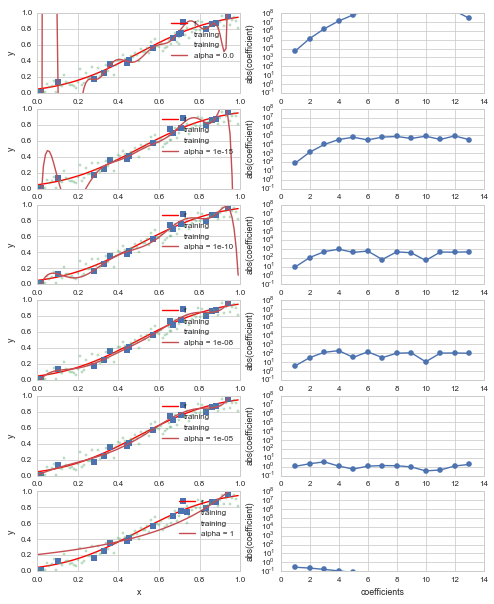

In [59]:
fig, rows = plt.subplots(6, 2, figsize=(8, 10))
d=13
alphas = [0.0, 1e-15, 1e-10, 1e-8, 1e-5, 1]
Xtrain = PolynomialFeatures(d).fit_transform(xntrain.reshape(-1,1))
Xtest = PolynomialFeatures(d).fit_transform(xntest.reshape(-1,1))
error_train=np.empty(len(alphas))
error_test=np.empty(len(alphas))
for i, alpha in enumerate(alphas):
    l,r=rows[i]
    est = Ridge(alpha=alpha)
    est.fit(Xtrain, yntrain)
    error_train[i] = mean_squared_error(yntrain, est.predict(Xtrain))
    error_test[i] = mean_squared_error(yntest, est.predict(Xtest))
    plot_functions(est, l, alpha, Xtest )
    plot_coefficients(est, r)

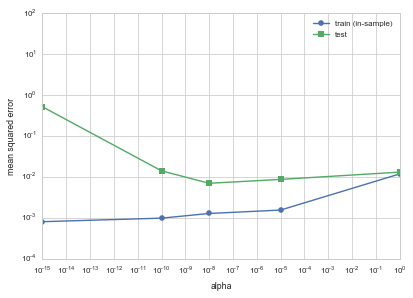

In [43]:
# not showing high test val at 0 well
plt.plot(alphas, error_train, 'o-', label='train (in-sample)')
plt.plot(alphas, error_test, 's-',  label='test')
plt.ylabel('mean squared error')
plt.xlabel('alpha')
plt.xscale("log")
plt.yscale("log")
plt.xlim([-1e-10, 1])
plt.legend(loc='upper right')

In [44]:
error_test

array([  8.64635300e+01,   5.15409416e-01,   1.40320688e-02,
         6.97765955e-03,   8.67952346e-03,   1.30663721e-02])

###Cross Validation

**Validation tries to get close to the notion of finding the out of sample error or risk**. 

One can think of both regularization and validation as attempts to minimize the out-of-sample risk. Of-course, we do not know the true out-of-sample error. Thus we are tring to estimate it based on the in-sample error. 

From the learning curves above, we always see that:

$$ R_{out} = R_{\cal{d}} + positive\,overfit\,term .$$

One can think of **regularization as an estimation of the overfit term** while **validation directly estimates $R_{out}$**.

Most models have some other parameters which need to be trained. For example, `Ridge` has $\alpha$. Such a parameter is called a hyper parameter.

Then the **validation** set if the set on which the hyperparameter is fit. You can think of the test set above as a validation set using which we pick $\alpha$. Then we'd need to keep one more set aside to test on. Thus we have the **train-validate-test** trichotomy.

Its not enough to train one one training set, and validate on another. Suppose you landed up, randomly with a peculiar sample? Best to average over such sets. This is called **cross-validation**. it can also be shown to be an unbiased estimate of the out of sample-error.

In scikit-learn, there is the concept of a meta-estimator, which behaves quite similarly to standard estimators, but allows us to wrap, for example, cross-validation, or methods that build and combine simpler models or schemes. For example:

```python
from sklearn.multiclass import OneVsOneClassifier
clf=OneVsOneClassifier(LogisticRegression())
```

>In scikit-learn, model selection is supported in two distinct meta-estimators, GridSearchCV and RandomizedSearchCV. They take as input an estimator (basic or composite), whose hyper-parameters must be optimized, and a set of hyperparameter settings to search through.

We now actually go ahead and to the train/validate split. Not once but multiple times, on a grid search, for different values of `C`, where `C` is our complexity parameter(s). For each `C`, we:

1. create `n_folds` folds. 
2. We then train on `n_folds -1` of these folds, test on the remaining
3. We average the results of all such combinations
4. We move on to the next value of `C`, and repeat 3
5. and find the optimal value that minimizes risk.
5. We finally use that value to make the final fit.

Notice the structure of the `GridSearchCV` estimator in `cv_optimize`.

In [51]:
#, 1e-6, 1e-5, 1e-3, 1.0
from sklearn.grid_search import GridSearchCV
def cv_optimize_ridge(X, y, n_folds=5):
    clf = Ridge()
    parameters = {"alpha": [0.0, 1e-15, 1e-13, 1e-10, 1e-8, 1e-6, 1e-5, 1e-3, 1.0]
}
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(X, y)
    return gs

In [52]:
d=13
itest2 = np.random.choice(range(xntest.shape[0]), 20, replace=False)
xtest2=np.array([xntest[i] for i in itest2])
ytest2=np.array([yntest[i] for i in itest2])

In [53]:
xall = np.concatenate((xntrain,xtest2))
yall = np.concatenate((yntrain,ytest2))
allofthem=zip(xall, yall)
allofthem = sorted(allofthem,key=lambda x: x[0])
xall = np.array([e[0] for e in allofthem])
yall = np.array([e[1] for e in allofthem])
print xall, yall

[ 0.02  0.03  0.06  0.09  0.1   0.11  0.15  0.17  0.2   0.23  0.24  0.25
  0.28  0.33  0.34  0.35  0.36  0.42  0.44  0.45  0.47  0.57  0.59  0.6
  0.62  0.67  0.71  0.72  0.74  0.76  0.83  0.86  0.88  0.9   0.94] [ 0.01        0.01        0.06906351  0.01        0.13164876  0.09999692
  0.12438825  0.1011199   0.14212606  0.12978766  0.25560856  0.18868424
  0.16836551  0.24883543  0.34936164  0.27984807  0.35714956  0.47571522
  0.37463448  0.41121901  0.44961392  0.56824085  0.59049889  0.57975275
  0.52240369  0.69400395  0.75429302  0.88639273  0.8129648   0.76395269
  0.79658118  0.86520161  0.87085518  0.89041966  0.9633774 ]


In [73]:
d=13
Xall = PolynomialFeatures(d).fit_transform(xall.reshape(-1,1))
print Xall.shape
bestmodel = cv_optimize_ridge(Xall, yall, n_folds=10)

(35, 14)


In [74]:
bestmodel.best_estimator_, bestmodel.best_params_, bestmodel.best_score_, bestmodel.grid_scores_

(Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, solver='auto', tol=0.001),
 {'alpha': 0.001},
 -3.1160906089037073,
 [mean: -148697.39562, std: 469591.93664, params: {'alpha': 0.0},
  mean: -616.29698, std: 1935.27804, params: {'alpha': 1e-15},
  mean: -153.98165, std: 393.23924, params: {'alpha': 1e-13},
  mean: -160.85752, std: 554.21824, params: {'alpha': 1e-10},
  mean: -136.06701, std: 442.03569, params: {'alpha': 1e-08},
  mean: -8.61105, std: 12.59125, params: {'alpha': 1e-06},
  mean: -4.64155, std: 6.28807, params: {'alpha': 1e-05},
  mean: -3.11609, std: 5.93396, params: {'alpha': 0.001},
  mean: -9.22376, std: 12.37276, params: {'alpha': 1.0}])

We get the estimator refit on train+validate. Just turns out that we get the same polynomial coefficients here, but this is not a given!

In [75]:
print bestmodel.best_estimator_.coef_
clf = Ridge(alpha=bestmodel.best_params_['alpha']).fit(Xall,yall)
print clf.coef_

[ 0.          0.65177889  0.47308706  0.29745246  0.11884801 -0.06550639
 -0.23272446 -0.33961257 -0.35763314 -0.28268718 -0.12883401  0.08122209
  0.32343593  0.57660005]
[ 0.          0.65177889  0.47308706  0.29745246  0.11884801 -0.06550639
 -0.23272446 -0.33961257 -0.35763314 -0.28268718 -0.12883401  0.08122209
  0.32343593  0.57660005]


In [56]:
def plot_functions_onall(est, ax, alpha, Xall):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(df.x, df.f, color='red', label='f')
    ax.plot(xall, yall, 's', alpha=0.5, label="all")
    ax.plot(xall, est.predict(Xall), lw=2,   label="alpha = %s" % str(alpha))
    ax.plot(xtest2, ytest2, 'o', alpha=0.2, label="test")
    ax.set_ylim((0, 1))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right')

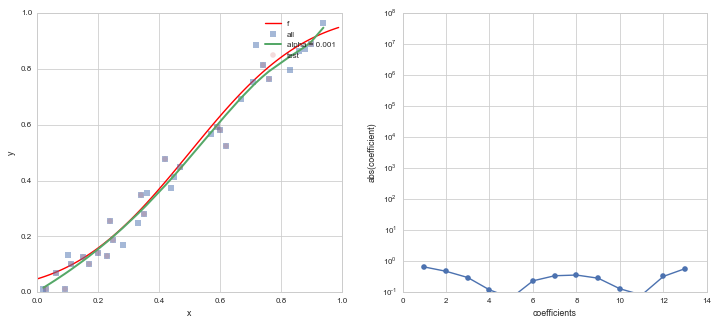

In [58]:
fig, rows = plt.subplots(1, 2, figsize=(12, 5))
l,r=rows
plot_functions_onall(bestmodel, l, bestmodel.best_params_['alpha'], Xall )
plot_coefficients(bestmodel.best_estimator_, r)

### Learning Curves


The bottom line is: finding the model which has an appropriate mix of bias and variance. We usually want to sit at the point of the tradeoff between the two: be simple but no simpler than necessary.

We do not want a model with too much variance: it would not generalize well. This phenomenon is also called *overfitting*. There is no point doing prediction if we cant generalize well. At the same time, if we have too much bias in our model, we will systematically underpredict or overpredict values and miss most predictions. This is also known as *underfitting*.

Cross-Validation provides us a way to find the "hyperparameters" of our model, such that we achieve the balance point.

Read http://scott.fortmann-roe.com/docs/BiasVariance.html

How to tell that a hypothesis is overfitting? Its not enough that the training error is low, though thats certainly an indication.

The training error is low but test error is high!

If we plot training error against, say, COMPLEXITY d, the training error will decrease with increasing d. But for the cross-validation (or for that matter, test error), we'll have an error curve which has a minumum and goes up again. Here the complexity is the inverse of the k.

![polynomial regression](https://dl.dropboxusercontent.com/u/75194/BDF/bias-variance-error.png)

###Some considerations on what to do in Machine Learning

Here we plot the train vs cv/test error as a function of the size of the training set.

The training set error increases as size of the data set increases. The intuition is that with more samples, you get further away from the interpolation limit. The cross validation error on the otherhand will decrease as **training set** size increases, as , more
data you have better the hypothesis you fit.

**High Bias**

Now consider the high bias situation. The training error will increase as before, to a point, and then flatten out. (There is only so much you can do to make a straight line fit a quadratic curve). The cv/test error, on the other hand will decrease, but then, it too will flatten out. These will be very close to each other, and after a point, getting more training data will not help!

![Learning Curve under high bias situation](https://dl.dropboxusercontent.com/u/75194/BDF/lc-hb.png)

Next consider the high variance situation. The training error will start out very low as usual, and go up slowly as even though we add points, we have enough wiggle room to start with, until it runs out and the error keeps increasing. The cv error, will, on the other hand, start out quite high, and remain high. Thus we will have a gap. In this case it will make sense to take more data, as that would drive the cv error down, and the training error up, until they meet.

![Learning Curve under high variance situation](https://dl.dropboxusercontent.com/u/75194/BDF/lc-hv.png)

###Next Time

* classification
* feature selection and engineering
* risk for classification
* different classification models
* model comparison